# NAND Game
<img src="./nand_game/Nand Game.svg" width="150" />
The Nand Game is inspired by the amazing course [From NAND to Tetris - Building a Modern Computer From First Principles](http://nand2tetris.org/) which is highly recommended.

## Introduction

The Nand Game takes you though building a working computer, starting from the most basic components. It does not require any prerequisites, in particular it does not require any previous knowledge about computer architecture or software, and does not require math skills beyond addition and subtraction. It does require some patience—some of the tasks might take a while to solve.

The game consists of a series of levels. In each level you are tasked with building a component that behaves according to a specification. This component can then be used as a building-block in the next level.

All components are specified through what input should lead to what output. How exactly you build the component is up to you, as long as input/output conforms to the specification. The game doesn't care whether or not you have found the simplest or the most efficient design. It only cares if it works correctly.

The first challenge is to build an inverter component.

The inverter has a single input and a single output, and the specification look like this:



The Nand gate

The only component available in the first level is the nand gate. The nand gate is a fundamental building block which all other components can be built from.

A nand gate has two inputs and one output, and the specification is like this:

| In1| In2| Out |
| -- | -- | --- |
| 0  | 0  | 1   |
| 1  | 0  | 1   |
| 0  | 1  | 1   |
| 1  | 1  | 0   |

In [2]:
import SchemDraw as schem
import SchemDraw.logic as l
import SchemDraw.elements as e

In [153]:
# %load ../library/schemdraw_lib.py
import SchemDraw as schem
import SchemDraw.logic as l
import SchemDraw.elements as e

def create_ff(mainlabel='FF', label_l=None, label_t=None, label_r=None, label_b=None, clkSign=True):
  """create dynamically a flipflop

    All labels are lists with signal definition form top to bottom spread out evenly or from left to right.
    Labels can have Latex notation like '$\overline{Q}$'

    Args:
        label_l (list): List of IO label left ['D','E','clk']
        label_t (list): List of IO label left ['SET']
        label_r (list): List of IO label left ['Q', '$\overline{Q}$']
        label_b (list): List of IO label left ['CLR']
        noClkSign (bool): Defining if clk triangle should be drawn work only on left labels, (extents 'clk' to '  clk') 

    Returns:
        bool: The object

  """
  # Left IO
  if label_l:
    cnt = len(label_l)
    if cnt == 1:
      loc = [0.8]
    elif cnt == 2:
      loc = [0.8,0.2]
    elif cnt == 3:
      loc = [0.8,0.5,0.2]
    else:
      loc = np.linspace(1,0,cnt+2)[1:-1]
    if clkSign:
      for i in range(cnt):
        if label_l[i] == 'clk':
          loc_clk = loc[label_l.index('clk')]
          label_l[i] = '  clk'
        elif label_l[i] == 'CLK':
          loc_clk = loc[label_l.index('CLK')]
          label_l[i] = '  CLK'
    # Create IO's
    ff_iol  = {'cnt'    :cnt,
               'labels' :label_l,
               'loc'    :loc,
               'lblsize':15}
  else:
    ff_iol = None
  # Top IO
  if label_t:
    cnt = len(label_t)
    if cnt == 1:
      loc = [0.5]
    else:
      loc = np.linspace(1,0,cnt+2)[1:-1]
    # Create IO's
    ff_iot  = {'cnt'    :cnt,
               'labels' :label_t,
               'loc'    :loc,
               'lblsize':12}
  else:
    ff_iot = None

  # Right IO
  if label_r:
    cnt = len(label_r)
    if cnt == 1:
      loc = [0.8]
    elif cnt == 2:
      loc = [0.8,0.2]
    elif cnt == 3:
      loc = [0.8,0.5,0.2]
    else:
      loc = np.linspace(1,0,cnt+2)[1:-1]
    # Create IO's
    ff_ior  = {'cnt'    :cnt,
               'labels' :label_r,
               'loc'    :loc,
               'lblsize':15}
  else:
    ff_ior = None

  # Bottom IO
  if label_b:
    cnt = len(label_b)
    if cnt == 1:
      loc = [0.5]
    else:
      loc = np.linspace(1,0,cnt+2)[1:-1]
    # Create IO's
    ff_iob  = {'cnt'    :cnt,
               'labels' :label_b,
               'loc'    :loc,
               'lblsize':12}
  else:
    ff_iob = None

  if clkSign:
    if 'loc_clk' in locals():
      #print(loc_clk)
      loc_clk = loc_clk +0.7
      clkSign_path = [[[0,loc_clk-0.2],[0.3,loc_clk],[0,loc_clk+0.2]]]
    DFF_0 =  e.blackbox(d.unit, d.unit*1.5, linputs=ff_iol, rinputs=ff_ior, tinputs=ff_iot, binputs=ff_iob, mainlabel=mainlabel)
    DFF = { 'name'  : mainlabel,
            'base'  : DFF_0,
            'paths' : clkSign_path # Add clk triangle
            #'paths' : [[[0,0.7],[0.3,0.9],[0,1.1]]] # Add clk triangle
          }
    return DFF
  else:
    return e.blackbox(d.unit, d.unit*1.5, linputs=ff_iol, rinputs=ff_ior, tinputs=ff_iot, binputs=ff_iob, mainlabel=mainlabel)

## Logic Gates

### Invert
An inv-component has a single input and a single output.
The output should be the opposite of the input, so 0 for 1 and vice versa.
Components are typically specified with a table showing inputs and outputs, like this:

$$\neg a = \overline{a}$$

| A  | Q   |
| -- | --- |
| 0  | 1   |
| 1  | 0   |

**Solution**
From a Nand erase the two middle entries. 

| A      | B      | Q   |
| ------ | ------ | --- |
| 0      | 0      | 1   |
| ~~1~~  | ~~0~~  | ~~1~~ |
| ~~0~~  | ~~1~~  | ~~1~~ |
| 1      | 1      | 0   |

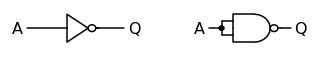

In [157]:
d = schem.Drawing()
not1 = d.add(l.NOT, xy=(0,0), lftlabel='$A$', rgtlabel='$Q$')

nand1 = d.add(l.andgate(inputs=2, nand=True), xy=(6,0))
line1 = d.add(e.LINE, d='right',  xy=nand1.out, l=d.unit/10, rgtlabel='$Q$')
line2 = d.add(e.LINE, d='down',  xy=nand1.in1, l=d.unit/6)
dot1 = d.add(e.DOT, xy=line2.center)
line2 = d.add(e.LINE, d='left',  xy=dot1.center, l=d.unit/8, lftlabel='$A$')
d.draw()
d.save('nand_game_out/01_invert.svg')

### And
An and gate output is 1 when both inputs are 1:

$$a \wedge b = ab$$

| A   | B   | Q |
| --- | --- | --- |
| 0   | 0   | 0   |
| 1   | 0   | 0   |
| 0   | 1   | 0   |
| 1   | 1   | 1   |

**Solution**
It is just an invertet NAND

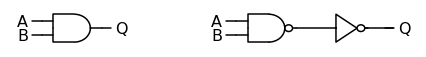

In [351]:
d = schem.Drawing()
and1 = d.add(l.AND2, xy=(0,0),)
line1 = d.add(e.LINE, d='left',  xy=and1.in1, l=d.unit/10, lftlabel='$A$')
line2 = d.add(e.LINE, d='left',  xy=and1.in2, l=d.unit/10, lftlabel='$B$')
line3 = d.add(e.LINE, d='right',  xy=and1.out, l=d.unit/10, rgtlabel='$Q$')

nand1 = d.add(l.andgate(inputs=2, nand=True), xy=(6,0))
not1  = d.add(l.NOT, xy=nand1.out)
line1 = d.add(e.LINE, d='left',  xy=nand1.in1, l=d.unit/10, lftlabel='$A$')
line2 = d.add(e.LINE, d='left',  xy=nand1.in2, l=d.unit/10, lftlabel='$B$')
line3 = d.add(e.LINE, d='right',  xy=not1.out, l=d.unit/10, rgtlabel='$Q$')
d.draw()
d.save('nand_game_out/02_and.svg')

### Or
An or gate output is 1 when at least one input is 1:

$$ a \vee b = a+b$$

| A   | B   | Q   |
| --- | --- | --- |
| 0   | 0   | 0   |
| 1   | 0   | 1   |
| 0   | 1   | 1   |
| 1   | 1   | 1   |

**Solution**
Invert Inputs of a NAND

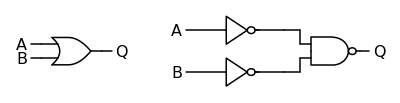

In [352]:
d = schem.Drawing()
or1 = d.add(l.OR2, xy=(0,0))
line1 = d.add(e.LINE, d='left',  xy=or1.in1, l=d.unit/10, lftlabel='$A$')
line2 = d.add(e.LINE, d='left',  xy=or1.in2, l=d.unit/10, lftlabel='$B$')
line3 = d.add(e.LINE, d='right',  xy=or1.out, l=d.unit/10, rgtlabel='$Q$')

nand1 = d.add(l.andgate(inputs=2, nand=True), xy=(8,0))
line1 = d.add(e.LINE, d='up', xy=nand1.in1, l=d.unit/6)
line2 = d.add(e.LINE, d='left', xy=line1.end, l=d.unit/6)
line3 = d.add(e.LINE, d='down', xy=nand1.in2, l=d.unit/6)
line4 = d.add(e.LINE, d='left', xy=line3.end, l=d.unit/6)
inv1 = d.add(l.NOT, xy=line2.end, reverse=True, lftlabel='$A$')
inv2 = d.add(l.NOT, xy=line4.end, reverse=True, lftlabel='$B$')
line5 = d.add(e.LINE, d='right', xy=nand1.out, l=d.unit/10, rgtlabel='$Q$')
d.draw()
d.save('nand_game_out/03_or.svg')

### Xor
An xor gate output is 1 when the two inputs are different:
  
$$a \oplus b = a\overline{b} + \overline{a}b$$

| A   | B   | Q   |
| --- | --- | --- |
| 0   | 0   | 0   |
| 1   | 0   | 1   |
| 0   | 1   | 1   |
| 1   | 1   | 0   |

**Solution**
a not(b) or b not (a)

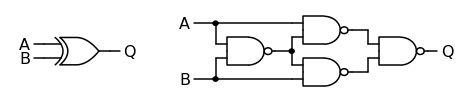

In [353]:
d = schem.Drawing()
xor1 = d.add(l.XOR2, xy=(0,0))
line1 = d.add(e.LINE, d='left',  xy=xor1.in1, l=d.unit/10, lftlabel='$A$')
line2 = d.add(e.LINE, d='left',  xy=xor1.in2, l=d.unit/10, lftlabel='$B$')
line3 = d.add(e.LINE, d='right',  xy=xor1.out, l=d.unit/10, rgtlabel='$Q$')

nand1 = d.add(l.andgate(inputs=2, nand=True), xy=(10,0))
line1 = d.add(e.LINE, d='up', xy=nand1.in1, l=d.unit/6)
line2 = d.add(e.LINE, d='left', xy=line1.end, l=d.unit/6)
line3 = d.add(e.LINE, d='down', xy=nand1.in2, l=d.unit/6)
line4 = d.add(e.LINE, d='left', xy=line3.end, l=d.unit/6)
nand2 = d.add(l.andgate(inputs=2, nand=True), xy=line2.end, reverse=True)
nand3 = d.add(l.andgate(inputs=2, nand=True), xy=line4.end, reverse=True)
line5 = d.add(e.LINE, d='down', xy=nand2.in1, l=d.unit/3)
dot1  = d.add(e.DOT, xy=line5.center)
line6 = d.add(e.LINE, d='left', xy=dot1.center, l=d.unit/6)
nand4 = d.add(l.andgate(inputs=2, nand=True), xy=line6.end, anchor='out', reverse=True)
line6 = d.add(e.LINE, d='left', xy=nand2.in2, l=d.unit, lftlabel='$A$')
line7 = d.add(e.LINE, d='left', xy=nand3.in1, l=d.unit, lftlabel='$B$')
line8 = d.add(e.LINE, d='up', xy=nand4.in2, l=d.unit/4)
line9 = d.add(e.LINE, d='down', xy=nand4.in1, l=d.unit/4)
dot2  = d.add(e.DOT, xy=line8.end)
dot3  = d.add(e.DOT, xy=line9.end)
line10 = d.add(e.LINE, d='right',  xy=nand1.out, l=d.unit/10,rgtlabel='$Q$')

d.draw()
d.save('nand_game_out/04_xor.svg')

### Logic Gates Appendium
<img src="./nand_game/Boolean Logic.png" width="500" />

* ```AND``` is used to let through or set to ```'0'```
* ```OR``` is used to let through or set to ```'1'```
* ```XOR``` is used to let through or invert signal


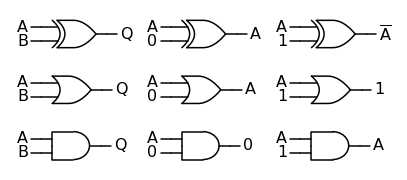

In [371]:
d = schem.Drawing()
# AND
and1 = d.add(l.AND2, xy=(0,0),)
line1 = d.add(e.LINE, d='left',  xy=and1.in1, l=d.unit/10, lftlabel='A')
line2 = d.add(e.LINE, d='left',  xy=and1.in2, l=d.unit/10, lftlabel='B')
line3 = d.add(e.LINE, d='right',  xy=and1.out, l=d.unit/10, rgtlabel='Q')

and2 = d.add(l.AND2, xy=(4,0),)
line1 = d.add(e.LINE, d='left',  xy=and2.in1, l=d.unit/10, lftlabel='A')
line2 = d.add(e.LINE, d='left',  xy=and2.in2, l=d.unit/10, lftlabel="0")
line3 = d.add(e.LINE, d='right',  xy=and2.out, l=d.unit/10, rgtlabel='0')

and3 = d.add(l.AND2, xy=(8,0),)
line1 = d.add(e.LINE, d='left',  xy=and3.in1, l=d.unit/10, lftlabel='A')
line2 = d.add(e.LINE, d='left',  xy=and3.in2, l=d.unit/10, lftlabel="1")
line3 = d.add(e.LINE, d='right',  xy=and3.out, l=d.unit/10, rgtlabel='A')

# OR
or1 = d.add(l.OR2, xy=(0,2))
line1 = d.add(e.LINE, d='left',  xy=or1.in1, l=d.unit/10, lftlabel='A')
line2 = d.add(e.LINE, d='left',  xy=or1.in2, l=d.unit/10, lftlabel='B')
line3 = d.add(e.LINE, d='right',  xy=or1.out, l=d.unit/10, rgtlabel='Q')

or2 = d.add(l.OR2, xy=(4,2))
line1 = d.add(e.LINE, d='left',  xy=or2.in1, l=d.unit/10, lftlabel='A')
line2 = d.add(e.LINE, d='left',  xy=or2.in2, l=d.unit/10, lftlabel='0')
line3 = d.add(e.LINE, d='right',  xy=or2.out, l=d.unit/10, rgtlabel='A')

or3 = d.add(l.OR2, xy=(8,2))
line1 = d.add(e.LINE, d='left',  xy=or3.in1, l=d.unit/10, lftlabel='A')
line2 = d.add(e.LINE, d='left',  xy=or3.in2, l=d.unit/10, lftlabel='1')
line3 = d.add(e.LINE, d='right',  xy=or3.out, l=d.unit/10, rgtlabel='1')

# XOR
xor1 = d.add(l.XOR2, xy=(0,4))
line1 = d.add(e.LINE, d='left',  xy=xor1.in1, l=d.unit/10, lftlabel='A')
line2 = d.add(e.LINE, d='left',  xy=xor1.in2, l=d.unit/10, lftlabel='B')
line3 = d.add(e.LINE, d='right',  xy=xor1.out, l=d.unit/10, rgtlabel='Q')

xor2 = d.add(l.XOR2, xy=(4,4))
line1 = d.add(e.LINE, d='left',  xy=xor2.in1, l=d.unit/10, lftlabel='A')
line2 = d.add(e.LINE, d='left',  xy=xor2.in2, l=d.unit/10, lftlabel='0')
line3 = d.add(e.LINE, d='right',  xy=xor2.out, l=d.unit/10, rgtlabel='A')

xor3 = d.add(l.XOR2, xy=(8,4))
line1 = d.add(e.LINE, d='left',  xy=xor3.in1, l=d.unit/10, lftlabel='A')
line2 = d.add(e.LINE, d='left',  xy=xor3.in2, l=d.unit/10, lftlabel='1')
line3 = d.add(e.LINE, d='right',  xy=xor3.out, l=d.unit/10, rgtlabel='$\overline{A}$')


d.draw()
d.save('nand_game_out/logic_gates_appendium.svg')

## Arithmetics

### Half Adder
Half Adder

An add component which adds two bits. The output is a two-bit value.

The h output is the high bit, the l is the low bit.

| A | B | Carry | Sum |
| - | - | ----- | --- |
| 0 | 0 | 0     | 0   |
| 0 | 1 | 0     | 1   |
| 1 | 0 | 0     | 1   |
| 1 | 1 | 1     | 0   |


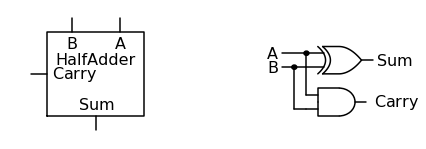

In [354]:
d = schem.Drawing()
tinputs = {'cnt':2, 'labels':['B','A']}
linputs = {'cnt':1, 'labels':['$Carry$']}
binputs = {'cnt':1, 'labels':['$Sum$']}
halfadder1 = d.add(e.blackbox(d.unit, d.unit, linputs=linputs, binputs=binputs, tinputs=tinputs, mainlabel='HalfAdder')) #, rinputs=rinputs))

xor1 = d.add(l.XOR2, rgtlabel='$Sum$', xy=(8,2))
dot1 = d.add(e.DOT, xy=xor1.in1)
line1 = d.add(e.LINE, d='left', l=d.unit/4, xy=xor1.in1, lftlabel='$A$')
line2 = d.add(e.LINE, d='left', l=d.unit/4, xy=xor1.in2, lftlabel='$B$')
line3 = d.add(e.LINE, d='down', l=d.unit/2, xy=dot1.center)
and1 = d.add(l.AND2, d='right', anchor='in1', xy=line3.end, rgtlabel='$Carry$')
line4 = d.add(e.LINE, d='left', l=d.unit/8, xy=and1.in2)
line5 = d.add(e.LINE, d='up', l=d.unit/2, xy=line4.end)
dot2 = d.add(e.DOT, xy=line5.end)

d.draw()
d.save('nand_game_out/05_half_adder.svg')

### Full Adder
An add component which adds three bits: a, b, and c.

The output is a two-bit value. Carry and Sum with is the HSb and LSb.

| A | B | $C_{in}$ | $C_{out}$ | Sum |
| - | - | - | ----- | --- |
| 0 | 0 | 0 | 0     | 0   |
| 0 | 0 | 1 | 0     | 1   |
| 0 | 1 | 0 | 0     | 1   |
| 0 | 1 | 1 | 1     | 0   |
| 1 | 0 | 0 | 0     | 1   |
| 1 | 0 | 1 | 1     | 0   |
| 1 | 1 | 0 | 1     | 0   |
| 1 | 1 | 1 | 1     | 1   |

**Solution**:
* Two Half-Adder can be linked to create a Full-Substractor combines with an Or

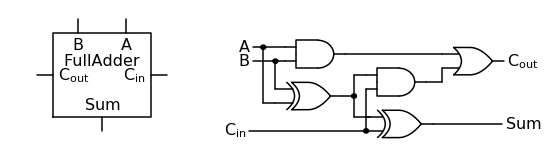

In [355]:
d = schem.Drawing()
tinputs = {'cnt':2, 'labels':['B','A']}
rinputs = {'cnt':1, 'labels':['$C_{in}$']}
linputs = {'cnt':1, 'labels':['$C_{out}$']}
binputs = {'cnt':1, 'labels':['$Sum$']}
fulladder1 = d.add(e.blackbox(d.unit, d.unit, linputs=linputs, binputs=binputs, tinputs=tinputs, rinputs=rinputs, mainlabel='FullAdder'))

or1 = d.add(l.OR2, rgtlabel='$C_{out}$', xy=(12,2))
line1 = d.add(e.LINE, d='down', l=d.unit/6, xy=or1.in2)
line2 = d.add(e.LINE, d='left', l=d.unit/6, xy=line1.end)
line3 = d.add(e.LINE, d='left', l=d.unit, xy=or1.in1)
and1 = d.add(l.AND2, xy=line2.end, reverse=True)
line4 = d.add(e.LINE, d='down', l=d.unit/2, xy=and1.in1)
dot1 = d.add(e.DOT, xy=line4.end)
xor1 = d.add(l.XOR2, xy=line4.end, anchor='in2')
line6 = d.add(e.LINE, d='right', l=d.unit/1.4, xy=xor1.out, rgtlabel="$Sum$")
line7 = d.add(e.LINE, d='left', l=d.unit/8, xy=and1.in2)
line8 = d.add(e.LINE, d='down', l=d.unit/2, xy=line7.end)
line9 = d.add(e.LINE, d='right', l=d.unit/6, xy=line8.end)
line10 = d.add(e.LINE, d='left', l=d.unit*1.2, xy=xor1.in2, lftlabel="$C_{in}$")
dot2 = d.add(e.DOT, xy=line8.center)
line11 = d.add(e.LINE, d='left', l=d.unit/8, xy=dot2.center)
xor2 = d.add(l.XOR2, xy=line11.end, reverse=True)
line12 = d.add(e.LINE, d='up', l=d.unit/3, xy=xor2.in2)
line13 = d.add(e.LINE, d='left', l=d.unit/8, xy=xor2.in1)
line14 = d.add(e.LINE, d='up', l=d.unit/1.5, xy=line13.end)
and2 = d.add(l.AND2, xy=line3.end, anchor="out", d='right')
line15 = d.add(e.LINE, d='left', l=d.unit/3, xy=and2.in1, lftlabel="A")
line16 = d.add(e.LINE, d='left', l=d.unit/3, xy=and2.in2, lftlabel="B")
dot3 = d.add(e.DOT, xy=line12.end)
dot4 = d.add(e.DOT, xy=line14.end)
 
d.draw()
d.save('nand_game_out/06_full_adder.svg')

### Multi-Bit Adder
Create 4Bit-Adder

**Solution**:
* Chain Full-Adders together

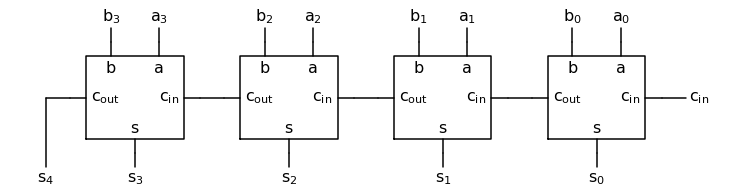

In [356]:
d = schem.Drawing()
tinputs = {'cnt':2, 'labels':['b','a']}
rinputs = {'cnt':1, 'labels':['$c_{in}$']}
linputs = {'cnt':1, 'labels':['$c_{out}$']}
binputs = {'cnt':1, 'labels':['$s$']}
fulladder1 = d.add(e.blackbox(d.unit, d.unit, linputs=linputs, binputs=binputs, tinputs=tinputs, rinputs=rinputs))
line1 = d.add(e.LINE, d='right',  xy=fulladder1.c_in, l=d.unit/4)
fulladder2 = d.add(e.blackbox(d.unit, d.unit, linputs=linputs, binputs=binputs, tinputs=tinputs, rinputs=rinputs), anchor='c_out')
line2 = d.add(e.LINE, d='right',  xy=fulladder2.c_in, l=d.unit/4)
fulladder3 = d.add(e.blackbox(d.unit, d.unit, linputs=linputs, binputs=binputs, tinputs=tinputs, rinputs=rinputs), anchor='c_out')
line3 = d.add(e.LINE, d='right',  xy=fulladder3.c_in, l=d.unit/4)
fulladder4 = d.add(e.blackbox(d.unit, d.unit, linputs=linputs, binputs=binputs, tinputs=tinputs, rinputs=rinputs), anchor='c_out')
line4 = d.add(e.LINE, d='right',  xy=fulladder4.c_in, l=d.unit/4, rgtlabel="$c_{in}$")
line5 = d.add(e.LINE, d='down',  xy=fulladder4.s, l=d.unit/6, lftlabel="$s_0$")
line6 = d.add(e.LINE, d='down',  xy=fulladder3.s, l=d.unit/6, lftlabel="$s_1$")
line7 = d.add(e.LINE, d='down',  xy=fulladder2.s, l=d.unit/6, lftlabel="$s_2$")
line8 = d.add(e.LINE, d='down',  xy=fulladder1.s, l=d.unit/6, lftlabel="$s_3$")
line9 = d.add(e.LINE, d='left',  xy=fulladder1.c_out, l=d.unit/4,)
line10 = d.add(e.LINE, d='down',  xy=line9.end, l=d.unit/1.2, lftlabel="$s_4$")
line11 = d.add(e.LINE, d='up',  xy=fulladder1.a, l=d.unit/6, rgtlabel="$a_3$")
line12 = d.add(e.LINE, d='up',  xy=fulladder1.b, l=d.unit/6, rgtlabel="$b_3$")
line13 = d.add(e.LINE, d='up',  xy=fulladder2.a, l=d.unit/6, rgtlabel="$a_2$")
line14 = d.add(e.LINE, d='up',  xy=fulladder2.b, l=d.unit/6, rgtlabel="$b_2$")
line15 = d.add(e.LINE, d='up',  xy=fulladder3.a, l=d.unit/6, rgtlabel="$a_1$")
line16 = d.add(e.LINE, d='up',  xy=fulladder3.b, l=d.unit/6, rgtlabel="$b_1$")
line17 = d.add(e.LINE, d='up',  xy=fulladder4.a, l=d.unit/6, rgtlabel="$a_0$")
line18 = d.add(e.LINE, d='up',  xy=fulladder4.b, l=d.unit/6, rgtlabel="$b_0$")

d.draw()
d.save('nand_game_out/07_multibit_adder.svg')

### Increment
Add 1 to a 16-bit number.

Ignore the carry if the result is larger than 16 bits

**Solution**
* Chain Full-Adders and set A to the number and B to Zero. The +1 comes from the cin which is set to '1'.

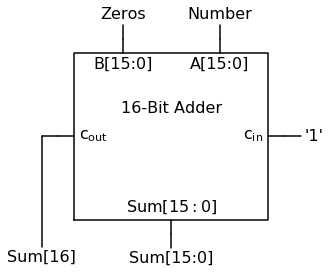

In [357]:
d = schem.Drawing()
tinputs = {'cnt':2, 'labels':['B[15:0]','A[15:0]']}
rinputs = {'cnt':1, 'labels':['$c_{in}$']}
linputs = {'cnt':1, 'labels':['$c_{out}$']}
binputs = {'cnt':1, 'labels':['$Sum[15:0]$']}
fulladder1 = d.add(e.blackbox(d.unit*2, d.unit*2, linputs=linputs, binputs=binputs, tinputs=tinputs, rinputs=rinputs, mainlabel="16-Bit Adder"))
line1 = d.add(e.LINE, d='right',  xy=fulladder1.c_in, l=d.unit/6, rgtlabel="\'1\'")
line2 = d.add(e.LINE, d='up',  xy=fulladder1.A150, l=d.unit/6, rgtlabel="Number")
line3 = d.add(e.LINE, d='up',  xy=fulladder1.B150, l=d.unit/6, rgtlabel="Zeros")
line4 = d.add(e.LINE, d='left',  xy=fulladder1.c_out, l=d.unit/6,)
line4 = d.add(e.LINE, d='down',  xy=line4.end, l=d.unit*1.32, lftlabel="Sum[16]")
line5 = d.add(e.LINE, d='down',  xy=fulladder1.Sum150, l=d.unit/6, lftlabel="Sum[15:0]")

d.draw()
d.save('nand_game_out/08_increment.svg')

### Subtraction
Outputs A minus B as a 16-bit number.

If the result is less than zero it is represented as 65536 plus the result.

Examples:

| Result | 16-bit Binary    | unsigned decimal |
| ------ | ---------------- | ---------------- |
|      1 | 0000000000000001 | 1 |
|      0 | 0000000000000000 | 0 |
|     -1 | 1111111111111111 | 65535 |
|     -2 | 1111111111111110 | 65534 |
|     -3 | 1111111111111101 | 65533 |

(This is equivalent to two's complement representation)

**Solution**:
* Two Half-Substractor can be linked to create a Full-Substractor

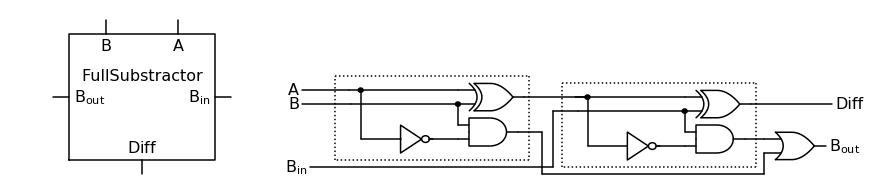

In [358]:
import numpy as np
d = schem.Drawing()
tinputs = {'cnt':2, 'labels':['B','A']}
rinputs = {'cnt':1, 'labels':['$B_{in}$']}
linputs = {'cnt':1, 'labels':['$B_{out}$']}
binputs = {'cnt':1, 'labels':['$Diff$']}
fullsubstractor1 = d.add(e.blackbox(d.unit*1.5, d.unit*1.5, linputs=linputs, binputs=binputs, tinputs=tinputs, rinputs=rinputs, mainlabel='FullSubstractor'))

# Create Half Substractor Subbloc
halfsubstractor1 = schem.Drawing()
xor1 = halfsubstractor1.add(l.XOR2)
line1 = halfsubstractor1.add(e.LINE, d='left', l=d.unit, xy=xor1.in1)
dot1 = halfsubstractor1.add(e.DOT, xy=xor1.in2)
line2 = halfsubstractor1.add(e.LINE, d='down', l=d.unit/4, xy=xor1.in2)
dot2 = halfsubstractor1.add(e.DOT, xy=line1.end)
line3 = halfsubstractor1.add(e.LINE, d='down', l=d.unit/1.71, xy=dot2.center)
and1 = halfsubstractor1.add(l.AND2, xy=line2.end, d='right', anchor="in1")
not1  = halfsubstractor1.add(l.NOT, xy=line3.end)
line3 = halfsubstractor1.add(e.LINE, d='left', l=d.unit*1.1, xy=dot1.center)
line4 = halfsubstractor1.add(e.LINE, d='left', l=d.unit/8, xy=line1.end)
anchors = {
    'diffin':line3.end,
    'bin':line4.end,
    'diffout':xor1.out,
    'bout':and1.out}
# Create Half Substractor Groups
halfsubstractor_group = schem.group_elements(halfsubstractor1, anchors=anchors)
halfsubstractor_group1 = d.add(halfsubstractor_group, xy=(19,2))
halfsubstractor_group2 = d.add(halfsubstractor_group, xy=(12,2.25))
# Draw Box around the Groups
def box_ha(d, halfsubstractor):
    ''' Draw a dotted box around the Halfadder elements '''
    topleft = halfsubstractor.diffin + np.array([-.5,1])
    d.add(e.LINE, xy=topleft, tox=topleft[0]+6, d='right', ls=':')
    d.add(e.LINE, d='down', toy=topleft[1]-3, ls=':')
    d.add(e.LINE, d='left', tox=topleft[0], ls=':')
    d.add(e.LINE, d='up',   toy=topleft[1], ls=':')
box_ha(d, halfsubstractor_group1)
box_ha(d, halfsubstractor_group2)

# Interconnect Half Substractor 2 output
line5 = d.add(e.LINE, d='right', l=d.unit/1.2, xy=halfsubstractor_group1.diffout, rgtlabel="Diff")
line6 = d.add(e.LINE, d='right', l=d.unit/5, xy=halfsubstractor_group1.bout)
xor1 = d.add(l.OR2, xy=line6.end, anchor='in1')
line7 = d.add(e.LINE, d='right', l=0, xy=xor1.out, rgtlabel="$B_{out}$")

# Interconnect Half Substractor 1&2
line8 = d.add(e.LINE, d='right', l=d.unit/1.5, xy=halfsubstractor_group2.diffout)
line9 = d.add(e.LINE, d='right', l=d.unit/4, xy=halfsubstractor_group2.bout)
line10 = d.add(e.LINE, d='down', l=d.unit/2, xy=line9.end)
line11 = d.add(e.LINE, d='right', l=d.unit*2.28, xy=line10.end)
line12 = d.add(e.LINE, d='up', l=d.unit/4, xy=line11.end)

# Interconnect Half Substractor 1 input
line13 = d.add(e.LINE, d='left', l=d.unit/2, xy=halfsubstractor_group2.diffin, lftlabel="B")
line14 = d.add(e.LINE, d='left', l=d.unit/2.1, xy=halfsubstractor_group2.bin, lftlabel="A")
line15 = d.add(e.LINE, d='left', l=d.unit/4, xy=halfsubstractor_group1.diffin)
line16 = d.add(e.LINE, d='down', l=d.unit/1.5, xy=line15.end)
line17 = d.add(e.LINE, d='left', l=d.unit*2.5, xy=line16.end, lftlabel="$B_{in}$")

d.draw()
d.save('nand_game_out/09_full_substractor.svg')

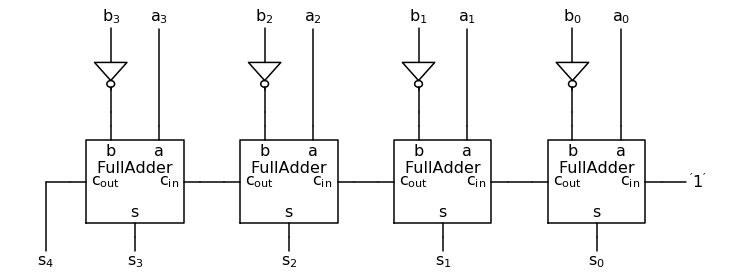

In [374]:
d = schem.Drawing()
tinputs = {'cnt':2, 'labels':['b','a']}
rinputs = {'cnt':1, 'labels':['$c_{in}$']}
linputs = {'cnt':1, 'labels':['$c_{out}$']}
binputs = {'cnt':1, 'labels':['$s$']}
fulladder1 = d.add(e.blackbox(d.unit, d.unit, linputs=linputs, binputs=binputs, tinputs=tinputs, rinputs=rinputs, mainlabel='FullAdder'))
line1 = d.add(e.LINE, d='right',  xy=fulladder1.c_in, l=d.unit/4)
fulladder2 = d.add(e.blackbox(d.unit, d.unit, linputs=linputs, binputs=binputs, tinputs=tinputs, rinputs=rinputs, mainlabel='FullAdder'), anchor='c_out')
line2 = d.add(e.LINE, d='right',  xy=fulladder2.c_in, l=d.unit/4)
fulladder3 = d.add(e.blackbox(d.unit, d.unit, linputs=linputs, binputs=binputs, tinputs=tinputs, rinputs=rinputs, mainlabel='FullAdder'), anchor='c_out')
line3 = d.add(e.LINE, d='right',  xy=fulladder3.c_in, l=d.unit/4)
fulladder4 = d.add(e.blackbox(d.unit, d.unit, linputs=linputs, binputs=binputs, tinputs=tinputs, rinputs=rinputs, mainlabel='FullAdder'), anchor='c_out')
line4 = d.add(e.LINE, d='right',  xy=fulladder4.c_in, l=d.unit/4, rgtlabel="$'1'$")
line5 = d.add(e.LINE, d='down',  xy=fulladder4.s, l=d.unit/6, lftlabel="$s_0$")
line6 = d.add(e.LINE, d='down',  xy=fulladder3.s, l=d.unit/6, lftlabel="$s_1$")
line7 = d.add(e.LINE, d='down',  xy=fulladder2.s, l=d.unit/6, lftlabel="$s_2$")
line8 = d.add(e.LINE, d='down',  xy=fulladder1.s, l=d.unit/6, lftlabel="$s_3$")
line9 = d.add(e.LINE, d='left',  xy=fulladder1.c_out, l=d.unit/4,)
line10 = d.add(e.LINE, d='down',  xy=line9.end, l=d.unit/1.2, lftlabel="$s_4$")
line11 = d.add(e.LINE, d='up',  xy=fulladder1.a, l=d.unit*1.16, rgtlabel="$a_3$")
line12 = d.add(e.LINE, d='up',  xy=fulladder1.b, l=d.unit/6)
line13 = d.add(e.LINE, d='up',  xy=fulladder2.a, l=d.unit*1.16, rgtlabel="$a_2$")
line14 = d.add(e.LINE, d='up',  xy=fulladder2.b, l=d.unit/6)
line15 = d.add(e.LINE, d='up',  xy=fulladder3.a, l=d.unit*1.16, rgtlabel="$a_1$")
line16 = d.add(e.LINE, d='up',  xy=fulladder3.b, l=d.unit/6)
line17 = d.add(e.LINE, d='up',  xy=fulladder4.a, l=d.unit*1.16, rgtlabel="$a_0$")
line18 = d.add(e.LINE, d='up',  xy=fulladder4.b, l=d.unit/6)
not1 = d.add(l.NOT, xy=line12.end, rgtlabel="$b_3$", reverse=True)
not1 = d.add(l.NOT, xy=line14.end, rgtlabel="$b_2$", reverse=True)
not1 = d.add(l.NOT, xy=line16.end, rgtlabel="$b_1$", reverse=True)
not1 = d.add(l.NOT, xy=line18.end, rgtlabel="$b_0$", reverse=True)

d.draw()
d.save('nand_game_out/10_multibit_substractor.svg')

### Equal to Zero
Should output 1 if and only if all bits in the input are 0.

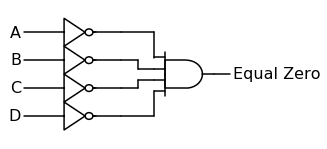

In [423]:
d = schem.Drawing()
inv1 = d.add(l.NOT,lftlabel="D", xy=(0,0))
inv2 = d.add(l.NOT,lftlabel="C", xy=(0,1))
inv3 = d.add(l.NOT,lftlabel="B", xy=(0,2))
inv4 = d.add(l.NOT,lftlabel="A", xy=(0,3))
and1 = d.add(l.AND4, xy=(4,1.5))
line1 = d.add(e.LINE, d="right", l=d.unit/3, xy=inv1.end) 
line2 = d.add(e.LINE, d="up", l=d.unit/3.3, xy=line1.end)
line3 = d.add(e.LINE, d="right", l=d.unit/3, xy=inv4.end) 
line4 = d.add(e.LINE, d="down", l=d.unit/3.3, xy=line3.end) 

line5 = d.add(e.LINE, d="right", l=d.unit/6, xy=inv3.end) 
line6 = d.add(e.LINE, d="down", l=d.unit/10, xy=line5.end) 
line7 = d.add(e.LINE, d="right", l=d.unit/6, xy=line6.end) 

line8 = d.add(e.LINE, d="right", l=d.unit/6, xy=inv2.end) 
line9 = d.add(e.LINE, d="up", l=d.unit/10, xy=line8.end) 
line10 = d.add(e.LINE, d="right", l=d.unit/6, xy=line9.end) 
line11 = d.add(e.LINE, d="right", l=d.unit/6, xy=and1.end, rgtlabel="Equal Zero") 

d.draw()
d.save('nand_game_out/11_equal_to_zero.svg')

### Less than Zero
Outputs 1 if the input as a 16-bit number is negative

Specification:

| In      | Out |
| ------- | --- |
| In >= 0 | 0   |
| In <  0 | 1   |

A number is considered less than zero if bit 15 is 1.

Bit numbering
Bits are numbered from right to left, starting with 0 as the rightmost bit. So bit 15 is the leftmost bit in a 16-bit word.

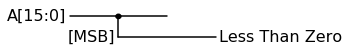

In [424]:
d = schem.Drawing()
bus1 = d.add(e.LINE, l=d.unit, lftlabel="A[15:0]")
dot1 = d.add(e.DOT, xy=bus1.center)
line2 = d.add(e.LINE, l=d.unit/4, d="down", xy=dot1.center)
line3 = d.add(e.LINE, l=d.unit, d="right", xy=line2.end, lftlabel="[MSB]", rgtlabel="Less Than Zero")

d.draw()
d.save('nand_game_out/11_less_than_zero.svg')

## Plumbing

### Selector / Demuxliplexer
A select-component selects one out of two input bits for output.

The s (select) bit indicates which input is selected: If 0, d0 is selected, if 1, d1 is selected.

| S | D1 | D0 | Output |
| - | -- | -- | ------ |
| 0 |  0 |  0 | 0 |
| 0 |  1 |  0 | 0 |
| 0 |  0 |  1 | 1 |
| 0 |  1 |  1 | 1 |
| 1 |  0 |  0 | 0 |
| 1 |  0 |  1 | 0 |
| 1 |  1 |  0 | 1 |
| 1 |  1 |  1 | 1 |

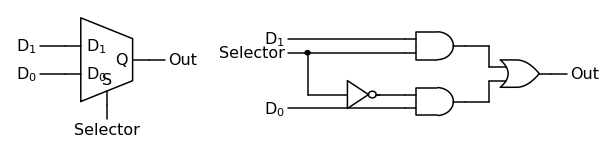

In [498]:
d = schem.Drawing()
m1 = d.add(e.mux(inputs=['$D_0$','$D_1$'], outputs=['Q'], ctrls=['S']))
line1 = d.add(e.LINE, d="left", l=d.unit/4, xy=m1.D_0, lftlabel="$D_0$")
line2 = d.add(e.LINE, d="left", l=d.unit/4, xy=m1.D_1, lftlabel="$D_1$")
line3 = d.add(e.LINE, d="down", l=d.unit/6, xy=m1.S, lftlabel="Selector")
line4 = d.add(e.LINE, d="right", l=d.unit/6, xy=m1.Q, rgtlabel="Out")

and1 = d.add(l.AND2, xy=(10,2))
line5 = d.add(e.LINE, d="left", l=d.unit*1.2, lftlabel="$D_1$", xy=and1.in1)
line6 = d.add(e.LINE, d="left", xy=and1.in2, l=d.unit*1.2, lftlabel="Selector")
line7 = d.add(e.LINE, d="right", xy=and1.out, l=d.unit/4)
line8 = d.add(e.LINE, d="down", xy=line7.end, l=d.unit/4)
or1 = d.add(l.OR2, xy=line8.end, d="right", anchor="in1")
line9 = d.add(e.LINE, d="down", xy=or1.in2, l=d.unit/4)
line10 = d.add(e.LINE, d="left", xy=line9.end, l=d.unit/4)
and2 = d.add(l.AND2, xy=line10.end, reverse = True)
line5 = d.add(e.LINE, d="left", l=d.unit*1.2, lftlabel="$D_0$", xy=and2.in1)
not1 = d.add(l.NOT, xy=and2.in2, reverse = True)
line11 = d.add(e.LINE, d="up", l=d.unit/2)
dot1 = d.add(e.DOT, xy=line11.end)
line12 = d.add(e.LINE, d="right", l=d.unit/6, xy=or1.out, rgtlabel="Out")
d.draw()
d.save('nand_game_out/12_selector_demultiplexer.svg')

### Switch /Multiplexer
A switch component channels a data bit through one of two output channels.

s (selector) determines if the d (data) bit is dispatched through c1 or c0.

| S | D | D1 | D0 |
| - | - | -- | -- |
| 0 | 0 | 0  | 0  |
| 0 | 1 | 0  | 1  |
| 1 | 0 | 0  | 0  |
| 1 | 1 | 1  | 0  |


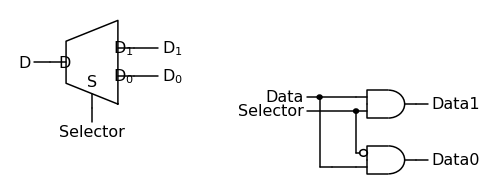

In [629]:
d = schem.Drawing()
m1 = d.add(e.mux(inputs=['$D_0$','$D_1$'], outputs=['D'], ctrls=['S']), reverse=True)
line1 = d.add(e.LINE, d="right", l=d.unit/4, xy=m1.D_0, rgtlabel="$D_0$")
line2 = d.add(e.LINE, d="right", l=d.unit/4, xy=m1.D_1, rgtlabel="$D_1$")
line3 = d.add(e.LINE, d="down", l=d.unit/6, xy=m1.S, lftlabel="Selector")
line4 = d.add(e.LINE, d="left", l=d.unit/6, xy=m1.D, lftlabel="D")

and1 = d.add(l.AND2, xy=(10,0), reverse=True)
line1 = d.add(e.LINE, l=d.unit/2, d="left", xy=and1.in2, lftlabel="Data")
line2 = d.add(e.LINE, l=d.unit/2, d="left", xy=and1.in1, lftlabel="Selector")
dot1 = d.add(e.DOT, xy=and1.in1)
line3 = d.add(e.LINE, l=d.unit/2, d="down", xy=and1.in1)

and2 = d.add(l.andgate(inputs=2, nand=False, inputnots=[1]), d="right", anchor="in1")
line4 = d.add(e.LINE, l=d.unit/8, d="right", xy=and1.out, rgtlabel="Data1")
line5 = d.add(e.LINE, l=d.unit/8, d="right", xy=and2.out, rgtlabel="Data0")
line6 = d.add(e.LINE, l=d.unit/4, d="left", xy=and2.in2)
line7 = d.add(e.LINE, l=d.unit/8, d="left", xy=line6.end)
line8 = d.add(e.LINE, l=d.unit/1.2, d="up", xy=line7.end)
dot2 = d.add(e.DOT, xy=line8.end)

d.draw()
d.save('nand_game_out/12_switch_multiplexer.svg')

## Memory

### Latch

$\overline{SR}-Latch$ and $SR-Latch$

A latch component stores and outputs a single bit

To describe this in an input/output table, we introduce a variable, out, which can be assigned a bit value and keep it:

| $\overline{Set}$ | $\overline{Reset}$ | Q              | State |
| --- | ----- | -------------- | ----- |
| 0   | 0     | ?              | Forbidden |
| 0   | 1     | 1              | Set |
| 1   | 0     | 0              | Reset |
| 1   | 1     | Previous State | out |

| Set | Reset | Q              | State |
| --- | ----- | -------------- | ----- |
| 0   | 0     | Previous State | Store |
| 0   | 1     | 0              | Reset |
| 1   | 0     | 1              | Set |
| 1   | 1     | ?              | Forbidden |

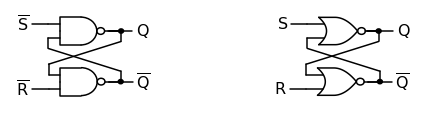

In [3]:
d = schem.Drawing()

# $\overline{SR}-Latch$
nand1 = d.add(l.andgate(inputs=2, nand=True), xy=(0,0))
line1 = d.add(e.LINE, d='down', l=d.unit/8, xy=nand1.in2)
line2 = d.add(e.LINE, d='down',theta=-20, l=d.unit/1.26, xy=line1.end)
line3 = d.add(e.LINE, d='down', l=d.unit/8, xy=line2.end)
line4 = d.add(e.LINE, d='left', l=d.unit/8, xy=line3.end)
nand2 = d.add(l.andgate(inputs=2, nand=True), reverse=True, xy=line4.end)
line5 = d.add(e.LINE, d='up', l=d.unit/8, xy=nand2.in2)
line6 = d.add(e.LINE, d='down',theta=20, l=d.unit/1.26, xy=line5.end)
line7 = d.add(e.LINE, d='up', l=d.unit/8, xy=line6.end)
line8 = d.add(e.LINE, d='left', l=d.unit/8, xy=line7.end)
line9 = d.add(e.LINE, d='left', l=d.unit/8, xy=line7.end)
line10 = d.add(e.LINE, d='right', l=d.unit/4, xy=nand1.out, rgtlabel="$Q$")
line11 = d.add(e.LINE, d='right', l=d.unit/4, xy=nand2.out, rgtlabel="$\overline{Q}$")
line12 = d.add(e.LINE, d='left', l=d.unit/6, xy=nand1.in1, lftlabel="$\overline{S}$")
line13 = d.add(e.LINE, d='left', l=d.unit/6, xy=nand2.in1, lftlabel="$\overline{R}$")
dot1 = d.add(e.DOT, xy=line7.end)
dot2 = d.add(e.DOT, xy=line3.end)


# SR-Latch
nor1 = d.add(l.NOR2, xy=(8,0))
line1 = d.add(e.LINE, d='down', l=d.unit/8, xy=nor1.in2)
line2 = d.add(e.LINE, d='down',theta=-20, l=d.unit/1.26, xy=line1.end)
line3 = d.add(e.LINE, d='down', l=d.unit/8, xy=line2.end)
line4 = d.add(e.LINE, d='left', l=d.unit/8, xy=line3.end)
nor2 = d.add(l.NOR2, reverse=True, xy=line4.end)
line5 = d.add(e.LINE, d='up', l=d.unit/8, xy=nor2.in2)
line6 = d.add(e.LINE, d='down',theta=20, l=d.unit/1.26, xy=line5.end)
line7 = d.add(e.LINE, d='up', l=d.unit/8, xy=line6.end)
line8 = d.add(e.LINE, d='left', l=d.unit/8, xy=line7.end)
line9 = d.add(e.LINE, d='left', l=d.unit/8, xy=line7.end)
line10 = d.add(e.LINE, d='right', l=d.unit/4, xy=nor1.out, rgtlabel="$Q$")
line11 = d.add(e.LINE, d='right', l=d.unit/4, xy=nor2.out, rgtlabel="$\overline{Q}$")
line12 = d.add(e.LINE, d='left', l=d.unit/6, xy=nor1.in1, lftlabel="$S$")
line13 = d.add(e.LINE, d='left', l=d.unit/6, xy=nor2.in1, lftlabel="$R$")
dot1 = d.add(e.DOT, xy=line7.end)
dot2 = d.add(e.DOT, xy=line3.end)

d.draw()
d.save('nand_game_out/13_SR-Latch.svg')

### Data Latch
A latch component stores and outputs a single bit

When st (store) is ``1``, the value on d is stored and emitted.

When st is ``0``, the value of d is ignored, and the previously stored value is still emitted.

To describe this in an input/output table, we introduce a variable, out, which can be assigned a bit value and keep it:

| E | D | Effect       | Output |
| - | - | ------------ | ------ |
| 1 | 0 | set out to 0 | out |
| 1 | 1 | set out to 1 | out |
| 0 | 1 | -            | out |
| 0 | 0 | -            | out |

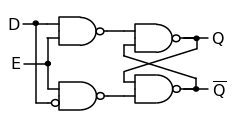

In [41]:
d = schem.Drawing()

nand1 = d.add(l.andgate(inputs=2, nand=True), xy=(0,0))
line1 = d.add(e.LINE, d='down', l=d.unit/8, xy=nand1.in2)
line2 = d.add(e.LINE, d='down',theta=-20, l=d.unit/1.26, xy=line1.end)
line3 = d.add(e.LINE, d='down', l=d.unit/8, xy=line2.end)
line4 = d.add(e.LINE, d='left', l=d.unit/8, xy=line3.end)
nand2 = d.add(l.andgate(inputs=2, nand=True), reverse=True, xy=line4.end)
line5 = d.add(e.LINE, d='up', l=d.unit/8, xy=nand2.in2)
line6 = d.add(e.LINE, d='down',theta=20, l=d.unit/1.26, xy=line5.end)
line7 = d.add(e.LINE, d='up', l=d.unit/8, xy=line6.end)
line8 = d.add(e.LINE, d='left', l=d.unit/8, xy=line7.end)
line9 = d.add(e.LINE, d='left', l=d.unit/8, xy=line7.end)
line10 = d.add(e.LINE, d='right', l=d.unit/4, xy=nand1.out, rgtlabel="$Q$")
line11 = d.add(e.LINE, d='right', l=d.unit/4, xy=nand2.out, rgtlabel="$\overline{Q}$")
line12 = d.add(e.LINE, d='left', l=d.unit/6, xy=nand1.in1)
line13 = d.add(e.LINE, d='left', l=d.unit/6, xy=nand2.in1)
nand3 = d.add(l.andgate(inputs=2, nand=True), xy=line12.end, reverse=True)
nand4 = d.add(l.andgate(inputs=2, nand=True, inputnots=[1]), xy=line13.end, reverse=True)
line14 = d.add(e.LINE, d='up', l=d.unit/1.65, xy=nand4.in2)
dot3 = d.add(e.DOT, xy=line14.center)
line15 = d.add(e.LINE, d='left', l=d.unit/4, xy=dot3.center, lftlabel="E")
line16 = d.add(e.LINE, d='left', l=d.unit/4, xy=nand3.in2, lftlabel="D")
line17 = d.add(e.LINE, d='left', l=d.unit/8, xy=nand4.in1)
line18 = d.add(e.LINE, d='up', l=d.unit/1.05, xy=line17.end)
dot = d.add(e.DOT, xy=line18.end)


dot1 = d.add(e.DOT, xy=line7.end)
dot2 = d.add(e.DOT, xy=line3.end)


d.draw()
d.save('nand_game_out/14_Data-Latch.svg')

### Data Flip-Flop
A DFF (Data Flip-Flop) component stores and outputs a bit, but only change the output when the clock signal change from ``0`` to ``1``.

When st (store) is ``1`` and clk (clock signal) is ``0`` the value on d is stored. But the previous value is still emitted.

When the clock signal changes to ``1``, the flip-flop starts emitting the new value.

When st is ``0``, the value of d does not have any effect.

When clk is ``1``, the value of st and d does not have any effect.

To describe this in a table requires two variables, in and out:

| E | D | Clk | Effect        | Out |
| - | - | --- | ------------- | --- |
| 1 | 0 | 0   | set in to 0   | out |
| 1 | 1 | 0   | set in to 1   | out |
| 0 | - | 0   | -             | out |
| - | - | 1   | set out to in | out |


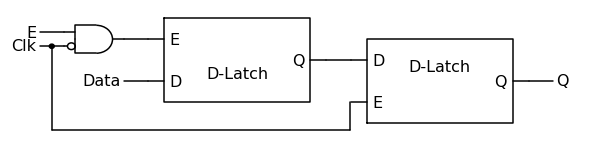

In [97]:
d = schem.Drawing()

rinputs = {'cnt':1, 'labels':['$Q$']}
linputs = {'cnt':1, 'labels':['$E$', '$D$']}
dlatch_1 = d.add(e.blackbox(d.unit*1.5, d.unit, linputs=linputs, rinputs=rinputs, mainlabel='D-Latch'))
line1 = d.add(e.LINE, d='left',  xy=dlatch_1.D, l=d.unit/4)
dlatch_2 = d.add(e.blackbox(d.unit*1.5, d.unit, linputs=linputs, rinputs=rinputs, mainlabel='D-Latch'), xy=line1.end, anchor='Q', reverse=True)
line2 = d.add(e.LINE, d='left',  xy=dlatch_2.D, l=d.unit/4, lftlabel='Data')
line3 = d.add(e.LINE, d='right',  xy=dlatch_1.Q, l=d.unit/4, rgtlabel='Q')
line4 = d.add(e.LINE, d='left',  xy=dlatch_2.E, l=d.unit/4)
nand4 = d.add(l.andgate(inputs=2, nand=False, inputnots=[1]), xy=line4.end, reverse=True)
line5 = d.add(e.LINE, d='left',  xy=nand4.in2, l=d.unit/4, lftlabel='E')
line6 = d.add(e.LINE, d='left',  xy=nand4.in1, l=d.unit/4, lftlabel='Clk')
dot1 = d.add(e.DOT, xy=line6.center)
line7 = d.add(e.LINE, d='down',  xy=dot1.center, l=d.unit)
line8 = d.add(e.LINE, d='right',  xy=line7.end, l=d.unit*3.07)
line9 = d.add(e.LINE, d='up',  xy=line8.end, l=d.unit/3)

d.draw()
d.save('nand_game_out/15_Data-FlipFlop.svg')

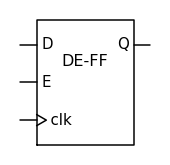

In [154]:
d = schem.Drawing()
d.add(create_ff(mainlabel='DE-FF', label_l=['D','E','clk'], label_r=['Q']))
d.draw()
d.save('nand_game_out/16_Data-FlipFlop.svg')

### Register
A 2-bit DFF component works like a data flip-flop, except two bits (d1 and d0) are stored and emitted instead of one.

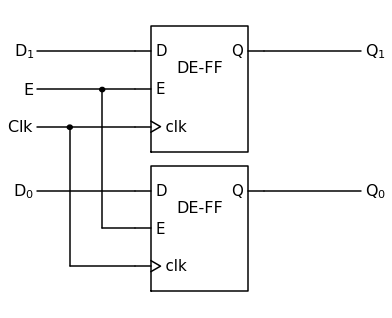

In [155]:
d = schem.Drawing()
dff_1 = d.add(create_ff(mainlabel='DE-FF', label_l=['D','E','clk'], label_r=['Q']))
dff_2 = d.add(create_ff(mainlabel='DE-FF', label_l=['D','E','clk'], label_r=['Q']), xy=(0,5))
line1 = d.add(e.LINE, d='left', l=d.unit, xy=dff_1.D, lftlabel='$D_0$')
line2 = d.add(e.LINE, d='left', l=d.unit, xy=dff_2.D, lftlabel='$D_1$')
line3 = d.add(e.LINE, d='left', l=d.unit, xy=dff_2.E, lftlabel='$E$')
line4 = d.add(e.LINE, d='left', l=d.unit, xy=dff_2.clk, lftlabel='$Clk$')
line5 = d.add(e.LINE, d='left', l=d.unit/3, xy=dff_1.E)
line6 = d.add(e.LINE, d='up', l=d.unit*1.66, xy=line5.end)
dot1 = d.add(e.DOT, xy=line6.end)
line7 = d.add(e.LINE, d='left', l=d.unit/1.5, xy=dff_1.clk)
line8 = d.add(e.LINE, d='up', l=d.unit*1.66, xy=line7.end)
dot2 = d.add(e.DOT, xy=line8.end)
line9 = d.add(e.LINE, d='right', l=d.unit, xy=dff_1.Q, rgtlabel='$Q_0$')
line10 = d.add(e.LINE, d='right', l=d.unit, xy=dff_2.Q, rgtlabel='$Q_1$')

d.draw()
d.save('nand_game_out/16_Data-FlipFlop.svg')

### Counter

### RAM

## Arithmetic Logic Unit

### Unary ALU

### ALU

### Condition

## Processor

### Combined Memory

### Instruction Decoder

### Control Unit

### Program Engine

### Computer

### Input and Output